<a href="https://colab.research.google.com/github/soulayman-al-abdallah/Data-Science-Projects/blob/main/M04_Improved_smoker_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Objective:**

We will work on the medical charges dataset, but considering the smoking status as the target feature (smoker or not). We will be building, evaluating, and improving our model.



## Dataset Description

*   **age**: age of primary beneficiary
*   **sex**: insurance contractor gender, female, male
*   **bmi**: Body mass index, (kg / m ^ 2) ideally 18.5 to 24.9
*   **children**: Number of children covered by health insurance / Number of dependents
*   **smoker**: Smoking     <--- **target**
*   **region**: area in the US, northeast, southeast, southwest, northwest.
*   **charges**: Individual medical costs billed by health insurance

## 1. Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
# clone git repo
!git clone https://github.com/zaka-ai/medical-cost-prediction

# change working directory
%cd medical-cost-prediction/data/

Cloning into 'medical-cost-prediction'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 18 (delta 2), reused 15 (delta 2), pack-reused 0
Unpacking objects: 100% (18/18), done.
/content/medical-cost-prediction/data




---



In [3]:
# read CSV file in Pandas
data = pd.read_csv('insurance.csv')

# display first 5 rows
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520




---



## 2. Exploratory Data Analysis

In [4]:
# get the number of rows and columns
rows = data.shape[0]
columns = data.shape[1]

print('There are {} rows and {} columns.'.format(rows,columns))

There are 1338 rows and 7 columns.




---



In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB




---



In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1335.000000,1338.000000,1338.000000
mean,39.207025,30.661423,1.094918,13270.422265
std,14.049960,6.101038,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.302500,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.687500,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010




---



#### Data Imbalance Checking

First, let's see how many smokers vs non-smokers we have.

In [7]:
# select smokers 
smokers = data[(data.smoker == "yes")]

# select non smokers
non_smokers = data[(data.smoker == "no")]

print('There are {} smokers and {} non-smokers.'.format(smokers.shape[0], non_smokers.shape[0]))

There are 274 smokers and 1064 non-smokers.


**▶  We can say that:**

From these results it is clear that we have an imbalance in our dataset that we will try to resolve later.



---



###Exploratory Data Analysis

Let's start by seeing how much each feature tells us about a person being  a smoker or not.

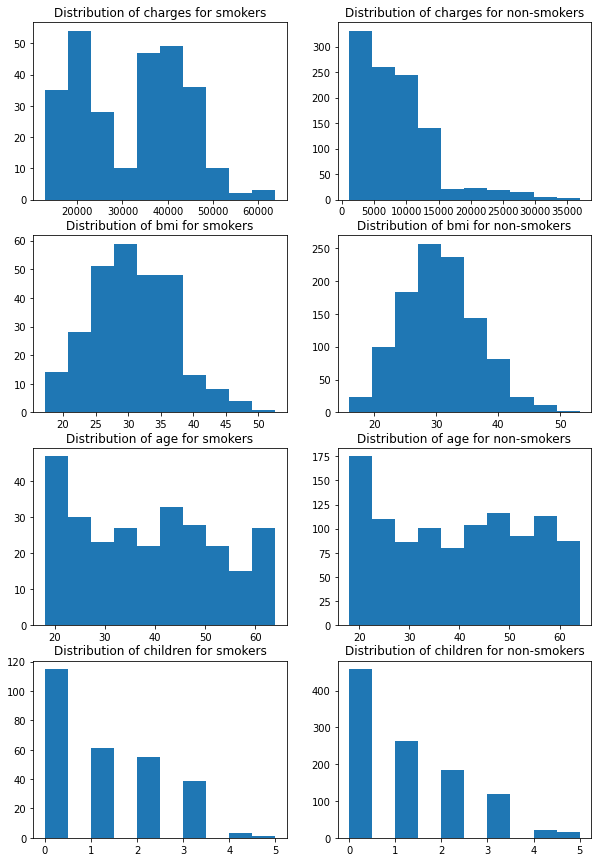

In [ ]:
numerical_features = ['charges', 'bmi', 'age', 'children']

subplot_number = 421
fig = plt.figure(figsize=(10,15))

for f in numerical_features:

  ax = fig.add_subplot(subplot_number)
  subplot_number += 1
  ax.hist(smokers[f])
  ax.set_title('Distribution of ' + f + ' for smokers')

  ax = fig.add_subplot(subplot_number)
  subplot_number += 1
  ax.hist(non_smokers[f])
  ax.set_title('Distribution of '+ f + ' for non-smokers')

**▶  We can say that:**

the feature that tells us most about a person being smoker or not is the medical charges that he pays.



---



Now let's see if the gender influences being a smoker or not.

smoker   no  yes
sex             
female  547  115
male    517  159


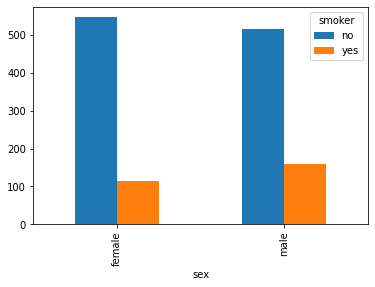

In [8]:
Gender = pd.crosstab(data['sex'],data['smoker'])
print(Gender)
Gender.plot(kind='bar')

**▶  We can say that:**

males smoke slightly more than females. So the gender can tell us if the person is smoker or not.



---



In [9]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

smoker      no  yes
region             
northeast  257   67
northwest  267   58
southeast  273   91
southwest  267   58


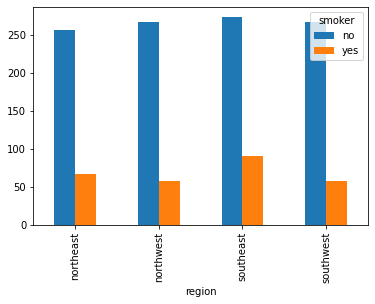

In [10]:
Region = pd.crosstab(data['region'],data['smoker'])
print(Region)
Region.plot(kind='bar')

Also here we have a slight difference.



---



## 3. Data Preprocessing
"Garbage in, garbage out". 

In [11]:
# print how many missing value in each column
data.isnull().sum()

age         0
sex         0
bmi         3
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
# drop rows with missing values
data = data.dropna()
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1335 non-null   int64  
 1   sex       1335 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1335 non-null   int64  
 4   smoker    1335 non-null   object 
 5   region    1335 non-null   object 
 6   charges   1335 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.4+ KB




---



#### Convert Categorical columns to numerical

*  sex column from male/female to 0/1.
*  smoker column from no/yes to 0/1.

In [14]:
# define dictionary 
gender = {'male':0, 'female':1}
# replace sex column with 0/1
data['sex'] = data['sex'].apply(lambda x: gender[x])
# print head to verify
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [15]:
# define dictionary 
smokers = {'no':0, 'yes':1}
# replace smokers column with 0/1
data['smoker'] = data['smoker'].apply(lambda x: smokers[x])
# print head to verify
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [16]:
# define dictionary 
regions = {'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3}
# replace region column with the corresponding values
data['region'] = data['region'].apply(lambda x: regions[x])
# print head to verify
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520




---



#### Normalization

We want to scale all the columns by dividing by the maximum

In [17]:
# get the max of each column
data_max = data.max()
data_max

age            64.00000
sex             1.00000
bmi            53.13000
children        5.00000
smoker          1.00000
region          3.00000
charges     63770.42801
dtype: float64

In [18]:
# divide each column by its maximum value
data = data.divide(data_max)
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000
mean,0.612441,0.495131,0.577102,0.219476,0.205243,0.495381,0.208299
std,0.219491,0.500164,0.114832,0.241145,0.404031,0.368180,0.190041
min,0.281250,0.000000,0.300395,0.000000,0.000000,0.000000,0.017592
25%,0.421875,0.000000,0.495059,0.000000,0.000000,0.333333,0.074365
50%,0.609375,0.000000,0.572181,0.200000,0.000000,0.333333,0.147187
75%,0.796875,1.000000,0.652880,0.400000,0.000000,0.666667,0.262144
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000




---



## 4. Model Training & Testing



#### Data splits

Before training, we need to split data into training (80%) & testing (20%)

In [19]:
features = ['age',	'sex',	'bmi',	'children', 'region',	'charges']
X = data[features]
 
y = data['smoker'] 

# split dataset in a 80/20 split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1068, 6) (1068,)
(267, 6) (267,)


#### Logistic Regression Modeling


In [20]:
# define our regression model
model = LogisticRegression()  
# train our model
model.fit(x_train, y_train)

LogisticRegression()

#### Evaluation

In [21]:
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_model_1 = accuracy_score(y_pred, y_test)
precision_model1 = precision_score(y_test, y_pred)
recall_model1 = recall_score(y_test, y_pred)
f1_score_model1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy_model_1,
      "\nPrecision:",precision_model1,
      "\nRecall:", recall_model1,
      "\nF1 Score:", f1_score_model1)

Accuracy: 0.898876404494382 
Precision: 0.9523809523809523 
Recall: 0.6153846153846154 
F1 Score: 0.7476635514018692


**▶  We can see that:**

the accuracy and precision are acceptable, but the recall, and the f1 score can be improved.



---



##5. Model Improvement

Let's try to improve our model, and expect better scores.

####Handle data Imbalance

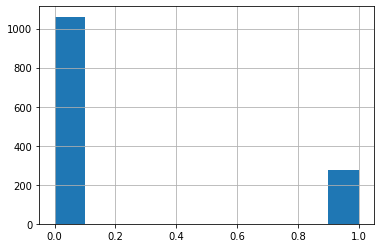

In [22]:
data['smoker'].hist()

We can see that we have a clearly imbalanced dataset. To handle it, we choose to do 2 steps:
* Oversampling the minority class with a factor of 0.5
* Undersampling the majority class to obtain the same number in the 2 classes
<br>
We do that by using the RandomOverSaampler and RandomUnderSampler from the imblearn library.

In [23]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

over = RandomOverSampler(sampling_strategy= 0.5)
x_new, y_new = over.fit_resample(X, y)
under = RandomUnderSampler(sampling_strategy= 1)
x_new, y_new = under.fit_resample(x_new, y_new)

(array([530.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 530.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

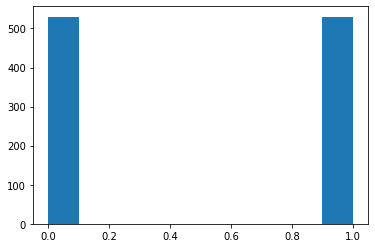

In [24]:
plt.hist(y_new)

In [25]:
#data split

x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)
model = LogisticRegression()  
model.fit(x_train, y_train)

LogisticRegression()

In [26]:
y_pred = model.predict(x_test)

accuracy_model2 = accuracy_score(y_test, y_pred)
precision_model2 = precision_score(y_test, y_pred)
recall_model2 = recall_score(y_test, y_pred)
f1_score_model2 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy_model2,
      "\nPrecision:",precision_model2,
      "\nRecall:", recall_model2,
      "\nF1 Score:", f1_score_model2)

Accuracy: 0.9575471698113207 
Precision: 0.9166666666666666 
Recall: 1.0 
F1 Score: 0.9565217391304348


We can see how much our scores got better when we balanced our dataset.



---



####Regularization with Hyperparameter Tuning

We will be tuning the hyperparameter C in the logistic regression model that we used. This hyperparameter represents regularization.
<br><img src="https://equatio-api.texthelp.com/svg/C%5C%20%3D%5C%20%5Cfrac%7B1%7D%7B%5Clambda%7D" alt="C equals 1 over lamda">

We will also know have to decide what type of regularization we will use: L1, or L2.

Since we have several parameters to tune, we will be doing what we call a GridSearch, to search for the best model having the best pair of hyperparameters.

In [27]:
from sklearn.model_selection import GridSearchCV
#We choose the liblinear solver because it supports the L1 regularization
LR = LogisticRegression(solver='liblinear')

LRparam_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
}

LR_search = GridSearchCV(LR, param_grid=LRparam_grid, verbose = 3, cv=5)

# fitting the model for grid search 
LR_search.fit(x_train , y_train)

# summarize
print('Mean Accuracy: %.3f' % LR_search.best_score_)
print('Config: %s' % LR_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .................C=0.1, penalty=l1;, score=0.965 total time=   0.0s
[CV 2/5] END .................C=0.1, penalty=l1;, score=0.982 total time=   0.0s
[CV 3/5] END .................C=0.1, penalty=l1;, score=0.947 total time=   0.0s
[CV 4/5] END .................C=0.1, penalty=l1;, score=0.953 total time=   0.0s
[CV 5/5] END .................C=0.1, penalty=l1;, score=0.976 total time=   0.0s
[CV 1/5] END .................C=0.1, penalty=l2;, score=0.947 total time=   0.0s
[CV 2/5] END .................C=0.1, penalty=l2;, score=0.953 total time=   0.0s
[CV 3/5] END .................C=0.1, penalty=l2;, score=0.906 total time=   0.0s
[CV 4/5] END .................C=0.1, penalty=l2;, score=0.917 total time=   0.0s
[CV 5/5] END .................C=0.1, penalty=l2;, score=0.917 total time=   0.0s
[CV 1/5] END ...................C=1, penalty=l1;, score=0.965 total time=   0.0s
[CV 2/5] END ...................C=1, penalty=l1;

We're seeing in the results, for each combination of hyperparameters how good the model is performing.

Let's assess the model's performance in general for those specified hyperparameters.

In [28]:
LR = LogisticRegression(solver='liblinear', C=100, penalty='l1')
LR.fit(x_train, y_train)

y_pred = LR.predict(x_test)

accuracy_model3 = accuracy_score(y_test, y_pred)
precision_model3 = precision_score(y_test, y_pred)
recall_model3 = recall_score(y_test, y_pred)
f1_score_model3 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy_model3,
      "\nPrecision:",precision_model3,
      "\nRecall:", recall_model3,
      "\nF1 Score:", f1_score_model3)

Accuracy: 0.9622641509433962 
Precision: 0.9252336448598131 
Recall: 1.0 
F1 Score: 0.9611650485436893


We can see that the results improved compared to the last model we built.



---



####AdaBoost Classifier

Now, we will work on improving our model, but this time through using ensemble methods, and what we will use for today is Adaboost.

In Adaboost, each model is learning to correct the previous model's mistakes (misclassified examples). After that, each model will have a weight that depends on how well he performed on the training data. And after that, different results are aggregated based on weighted averaging.

In [29]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=10)
clf.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=10)

In [30]:
y_pred = clf.predict(x_test)
accuracy_model4 = accuracy_score(y_test, y_pred)
precision_model4 = precision_score(y_test, y_pred)
recall_model4 = recall_score(y_test, y_pred)
f1_score_model4 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy_model4,
      "\nPrecision:",precision_model4,
      "\nRecall:", recall_model4,
      "\nF1 Score:", f1_score_model4)

Accuracy: 0.9575471698113207 
Precision: 0.9166666666666666 
Recall: 1.0 
F1 Score: 0.9565217391304348


####AdaBoost Classifier tuned

In [31]:
adaBoostInstance_hypertuned = AdaBoostClassifier()

parameters = {
    'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20, 30],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
    'algorithm': ['SAMME', 'SAMME.R'],

}
clf = GridSearchCV(adaBoostInstance_hypertuned, parameters, cv=5)
clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02,
                                           1.03, 1.04],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          20, 30]})

In [32]:
print("Tuned Hyperparameters :", clf.best_params_)

Tuned Hyperparameters : {'algorithm': 'SAMME.R', 'learning_rate': 1.04, 'n_estimators': 30}


In [33]:
adaBoostInstance_hypertuned = AdaBoostClassifier(algorithm = 'SAMME', 
                            learning_rate= 1.04,
                            n_estimators=30)

adaBoostInstance_hypertuned.fit(x_train, y_train)

y_pred = adaBoostInstance_hypertuned.predict(x_test)
accuracy_model4 = accuracy_score(y_test, y_pred)
precision_model4 = precision_score(y_test, y_pred)
recall_model4 = recall_score(y_test, y_pred)
f1_score_model4 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy_model4,
      "\nPrecision:",precision_model4,
      "\nRecall:", recall_model4,
      "\nF1 Score:", f1_score_model4)

Accuracy: 0.9528301886792453 
Precision: 0.9238095238095239 
Recall: 0.9797979797979798 
F1 Score: 0.9509803921568627


**We can see that hyperparameter tuning the adaboost classifier improved the scores more and more 👍**